### Importing/loading the necessary libraries

In [40]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm
import random
import networkx as nx
import matplotlib.pyplot as plt
import re
import pandas as pd
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import spacy.util
from tqdm import tqdm
import textacy
from textacy.extract import subject_verb_object_triples
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sklearn
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy
import numpy as np
import codecs
import os
import json
import pandas as pd
from pathlib import Path
from afinn import Afinn
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import operator

In [ ]:
from allennlp.predictors.predictor import Predictor
model_url = "https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2021.03.10.tar.gz"
predictor = Predictor.from_path(model_url)

In [41]:
import time
start = time.process_time()

In [42]:
nlp = spacy.load('C:\\Users\\ashwa\custom_ner_model2')

Texts for testing :

In [48]:
text="Akbar was once infuriated with Birbal and banished him from his kingdom. Birbal travelled to a faraway village and assumed a new identity and started working as a farmer. After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom. The soldiers searched from one end of the kingdom to another but could not find Birbal. Akbar then came up with an idea to find Birbal. He sent word across the kingdom that the head of each village has to send him a pot full of wit. Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him. The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit. Birbal stepped in to help and came up with a way to give the king what he wanted. He put a small watermelon into the pot without separating it from its vine. He watered it every day and grew it big enough so that all the space in the pot was taken up. Birbal then separated the watermelon from the vine and sent the pot to the king. The instruction that was sent with the pot read, “You can find the wit in the pot if you carefully remove the watermelon without cutting it.” Akbar realised that only Birbal could have sent the pot. He travelled to the village himself and brought Birbal back to the capital."
text2="""Once upon a time there lived a poor widow and her son Jack. One day, Jack’s mother told him to sell their only cow. Jack went to the market and on the way he met a man who wanted to buy his cow. Jack asked, “What will you give me in return for my cow?” The man answered, “I will give you five magic beans!” Jack took the magic beans and gave the man the cow. But when he reached home, Jack’s mother was very angry. She said, “You fool! He took away your cow and gave you some beans!” She threw the beans out of the window. Jack was very sad and went to sleep without dinner.
The next day, when Jack woke up in the morning and looked out of the window, he saw that a huge beanstalk had grown from his magic beans! He climbed up the beanstalk and reached a kingdom in the sky. There lived a giant and his wife. Jack went inside the house and found the giant’s wife in the kitchen. Jack said, “Could you please give me something to eat? I am so hungry!” The kind wife gave him bread and some milk. While he was eating, the giant came home. The giant was very big and looked very fearsome. Jack was terrified and went and hid inside. The giant cried, “Fee-fi-fo-fum, I smell the blood of an Englishman. Be he alive, or be he dead, I’ll grind his bones to make my bread!” The wife said, “There is no boy in here!” So, the giant ate his food and then went to his room. He took out his sacks of gold coins, counted them and kept them aside. Then he went to sleep. In the night, Jack crept out of his hiding place, took one sack of gold coins and climbed down the beanstalk. At home, he gave the coins to his mother. His mother was very happy and they lived well for sometime."""
text1= "Once upon a time a Tortoise and a Rabbit had an argument about who was faster. They decided to settle the argument with a race. They agreed on a route and started off the race. The rabbit shot ahead and ran briskly for some time. Then seeing that he was far ahead of the tortoise, he thought he'd sit under a tree for some time and relax before continuing the race. He sat under the tree and soon fell asleep. The tortoise plodding on overtook him and soon finished the race, emerging as the undisputed champ. The rabbit woke up and realized that he'd lost the race. The rabbit was disappointed at losing the race because he was overconfident"
text4 = "Patty, a milkmaid milked her cow and had two full pails of fresh, creamy milk. She put both pails of milk on a stick and set off to the market to sell the milk. As she took steps towards the market, her thoughts took steps towards wealth. On her way, she kept thinking about the money she would make from selling the milk. Then she thought about what she would do with that money. She was talking to herself and said, “Once I get the money, I’ll buy a chicken. The chicken will lay eggs and I will get more chickens. They’ll all lay eggs, and I will sell them for more money. Then, I’ll buy the house on the hill and everyone will envy me.” She was very happy that soon she would be very rich. With these happy thoughts, she marched ahead. But suddenly, she tripped and fell. Both the pails of the milk fell and all her dreams were shattered. The milk spilt onto the ground, and all Patty could do was cry. “No more dream,” she cried foolishly!"
text5= "Tom had to fix some things around the house. He had to fix the door. He had to fix the \
window. But before he did anything he had to fix the toilet. Tom called over his best \
friend Jim to help him. Jim brought with him his friends Molly and Holly. And Tom thought that \
Jim was going to bring Dolly with him but he didn't. The four of them got to work right \
away. Fixing the toilet was easy. Fixing the door was also easy but fixing the window was \
very hard. The window was stuck and could not be opened. They all pushed on the window \
really hard until finally it opened. Once the window was fixed the four of them made a \
delicious dinner and talked about all of the good work that they had done. Tom was glad \
that he had such good friends to help him with his work."
text1="A rich man's son was graduating college. For months, the son was asking his father for a new car, knowing that his father had more than enough money. When graduation day came, the young man's father called him into the study. The father handed him a wrapped gift and congratulated him about his graduation and his achievement. Looking disappointed, the son opened the gift to find a lovely, leather bound journal, with the young man's name embossed on the cover. He angrily raised his voice, threw down the journal and stormed out. The young man had not seen his father since graduation day. He became successful and was wealthy like his father, with a beautiful home and family. He came to realize his father was aging and it may be time to put the past behind them. Just then, he received a message that his father had passed, and he had to return home to take care of the estate. As the mourning son regretfully returned home, he began searching through his father's important papers and saw that still new journal, just as he had left it. He opened it, and as he flipped through the pages a car key dropped from the back of the journal. A dealer tag was attached to the key that read. Paid in full. Wherever this car takes you, write about it to remember it forever. Love, Dad"
text6="Irene Adler is always the woman to Sherlock Holmes . I haven't seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer--excellent for drawing the veil from men's motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to  introduce a distracting factor which might throw a doubt upon all his  mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory."
text7="Once upon a time in a village, there was an old man named Jerry.  He hadn’t seen his son for few years and wanted to meet his son who lived in a city.  He started his journey and came to a city where his son used to work and stay.  He went to the place from where he used to get letters long back.  When he knocked the door he was excited and smiled with joy to meet his son.  Unfortunately, someone else opened the door.  Jerry asked, “I suppose Thomas should be staying in this place.”  The person said, “No! He had left the place and shifted to a different location.” Jerry was disappointed and just thinking how to meet his son. He started to walk in the street and the neighbors asked Jerry, “Are you looking for Thomas?” Jerry responded by nodding his head. The neighbors gave the present address and office address of Thomas to the Jerry. Jerry thanked them and started towards the path which will lead to his son.  Jerry went to the office and asked at the reception counter, “Could you please tell me the location of Thomas, in this office?” The receptionist asked, “May I know how you are related to him?” Jerry responded politely by saying, “I’m his father.” The receptionist said, Jerry to wait for a moment and rang up to Thomas and conveyed the same. Thomas was shocked and told the receptionist to send his father to the cabin immediately. Jerry entered the cabin and when he saw Thomas, his eyes were filled with tears. Thomas was happy to see his father. They had a simple conversation for a while and then Jerry asked Thomas, “Son! Mom wants to see you. Can you Come home with me?” Thomas responded, “No father. I can’t come. I am very busy working for my success and it’s hard to manage a leave to visit as my hands are full with loads of stressful work .”  Jerry gave a simple smile and said, “Okay! You may do your work. I’ll be going back to our village today evening.”  Thomas asked, “You can stay for few days with me. Please.”  Jerry responded after a moment of silence, “Son. You are busy with your tasks. I don’t want to make you uncomfortable or become a burden for you.” Continued, “I hope if ever had a chance to meet you again, I would be happy.” He left the place. After a few weeks, Thomas wondered why his father came alone after a long time, he felt bad for treating his father in a weird manner.  He felt guilty for it and took a leave in office for few days and went to his village to meet his father.  When he went to the place where he was born and grew up, he saw that his parents were not there.  He was shocked and asked the neighbors, “What happened here? My parents have to be there. Where are they now?”  The neighbors gave the address of the place where his parents are staying. Thomas rushed to the place and noticed that the place was like a graveyard. Thomas eyes were filled with tears and started to walk slowly towards the place.  His father Jerry noticed Thomas in a far distance and waved his hand to draw his attention.  Thomas saw his father and started to run and hugged him. Jerry asked, “How are you?” and continued, “What a surprise to see you here.  I didn’t expect that you would be coming to this place.”  Thomas felt ashamed and kept his head down.  Jerry said, “Why are you feeling bad.  Has anything wrong happened?”  Thomas responded, “No father” continued, “It’s just I never knew that I would be seeing you in this position in our village.” Jerry smiled and said, “I had taken a loan when you moved to a city for your college to pay for your education, then again when you wanted a new car,  but due to a loss in farming, I couldn’t repay the loan. So I thought of approaching you for a help, but you were very busy and stressed with your work.  I just didn’t want to burden you with this problem and remained silent and I had to let go of our home to repay the loan.” Thomas whispered, “You could’ve told me. I’m not an outsider.”  Jerry turned around and said, “You were very busy and stressed with your work which made me remain quiet.  All we wanted was your happiness. So I kept quiet.” Thomas started to cry and hugged his father again.  He apologized to his father and asked to forgive him for his mistake.  Jerry smiled and said, “No need for that.  I’m happy with what I got now.  All I want is that you spare some time for us, we love you very much and at this old age it’s hard to travel to see you often.”"
text8="The mules were my especial delight; and an hour's study of a constant succession of them introduced me to many of their characteristics: for six of these odd little beasts drew each army wagon and went hopping like frogs through the stream of mud that gently rolled along the street. The coquettish mule had small feet, a nicely trimmed tassel of a tail, perked-up ears, and seemed much given to little tosses of the head, affected skips and prances; and, if he wore the bells or were bedizened with a bit of finery, put on as many airs as any belle. The moral mule was a stout, hard-working creature, always tugging with all his might, often pulling away after the rest had stopped, laboring under the conscientious delusion that food for the entire army depended upon his private exertions. I respected this style of mule; and, had I possessed a juicy cabbage, would have pressed it upon him with thanks for his excellent example. The histrionic mule was a melodramatic quadruped, prone to startling humanity by erratic leaps and wild plunges, much shaking of his stubborn head, and lashing out of his vicious heels; now and then falling flat and apparently dying a la Forrest; a gasp--a squirm--a flop, and so on, till the street was well blocked up, the drivers all swearing like demons in bad hats, and the chief actor's circulation decidedly quickened by every variety of kick, cuff, jerk and haul. When the last breath seemed to have left his body, and doctors were in vain, a sudden resurrection took place; and if ever a mule laughed with scornful triumph, that was the beast, as he leisurely rose, gave a comfortable shake, and, calmly regarding the excited crowd, seemed to say-- A hit! a decided hit! for the stupidest of animals has bamboozled a dozen men. Now, then! what are you stopping the way for? The pathetic mule was, perhaps, the most interesting of all; for, though he always seemed to be the smallest, thinnest, weakest of the six, the postillion with big boots, long- tailed coat and heavy whip was sure to bestride this one, who struggled feebly along, head down, coat muddy and rough, eye spiritless and sad, his very tail a mortified stump, and the whole beast a picture of meek misery, fit to touch a heart of stone. The jovial mule was a roly-poly, happy-go-lucky little piece of horseflesh, taking everything easily, from cudgeling to caressing; strolling along with a roguish twinkle of the eye, and, if the thing were possible, would have had his hands in his pockets and whistled as he went. If there ever chanced to be an apple core, a stray turnip or wisp of hay in the gutter, this Mark Tapley was sure to find it, and none of his mates seemed to begrudge him his bite. I suspected this fellow was the peacemaker, confidant and friend of all the others, for he had a sort of Cheer-up-old-boy-I'll-pull-you-through look which was exceedingly engaging.Pigs also possessed attractions for me, never having had an opportunity of observing their graces of mind and manner till I came to Washington, whose porcine citizens appeared to enjoy a larger liberty than many of its human ones. Stout, sedate-looking pigs hurried by each morning to their places of business, with a preoccupied air, and sonorous greetings to their friends. Genteel pigs, with an extra curl to their tails, promenaded in pairs, lunching here and there, like gentlemen of leisure. Rowdy pigs pushed the passersby off the sidewalk; tipsy pigs hiccoughed their version of We wont go home till morning from the gutter; and delicate young pigs tripped daintily through the mud as if they plumed themselves upon their ankles, and kept themselves particularly neat in point of stockings. Maternal pigs, with their interesting families, strolled by in the sun; and often the pink, baby-like squealers lay down for a nap, with a trust in Providence worthy of human imitation."

### Pre-Processing the text

Replacing contraction words with its expansion:

In [49]:
contractions_dict = {"aren't" : "are not","can’t" : "cannot", "couldn't" : " could not", "didn't" : "did not",
                     "doesn't" : "does not", "don't" : "do not","hadn't" : "had not","hasn't" : "has not","haven't" : "have not",
                     "he'd" : "he had","he'll" : "he will","he's" : "he is","I'd" : "I would","I'll" : "I will","I'm" : "I am",
                     "I've" : "I have","isn’t" : "is not","let's" : "let us","ain't" : "are not","mightn't" : "might not","mustn't" : "must not",
                     "shan't" : "shall not","she'd" : "she would","she'll" : "she willl","she's" : "she is","shouldn't" : "should not",
                     "that's" : "that is","there's" : "there is","they'd" : "they would","they'll" : "they will","they're" : "they are",
                     "they've" : "they have","we'd" : "we would","we're" : "we are","we've" : "we have","weren't" : "were not",
                     "what'll" : "what will","what're" : "what are","what's" : "what is","what've" : "what have","where's" : "where is",
                     "who'd" : "who would","who'll" : "who will","who're" : "who are","who've" : "who have","won't" : "will not",
                     "wouldn't" : "would not","you'd" : "you would","you'll" : "you will","you're" : "you are","you've" : "you have"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
contract_text = expand_contractions(text,contractions_dict)
print(contract_text)

Akbar was once infuriated with Birbal and banished him from his kingdom. Birbal travelled to a faraway village and assumed a new identity and started working as a farmer. After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom. The soldiers searched from one end of the kingdom to another but could not find Birbal. Akbar then came up with an idea to find Birbal. He sent word across the kingdom that the head of each village has to send him a pot full of wit. Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him. The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit. Birbal stepped in to help and came up with a way to give the king what he wanted. He put a small watermelon into the pot without separating it from its vine. He watered it every day and grew it big enough so that all the space in the 

In [50]:
new_text=predictor.coref_resolved(contract_text) 
print(new_text)

Splitting into sentences:

In [51]:
doc = nlp(contract_text)
sentences = [sent.text.strip() for sent in doc.sents]

Tokenization :

In [52]:
doc1=nlp(contract_text)
word_token=[]
for token in doc1 :
    word_token.append(token.text)
word_token

['Akbar',
 'was',
 'once',
 'infuriated',
 'with',
 'Birbal',
 'and',
 'banished',
 'him',
 'from',
 'his',
 'kingdom',
 '.',
 'Birbal',
 'travelled',
 'to',
 'a',
 'faraway',
 'village',
 'and',
 'assumed',
 'a',
 'new',
 'identity',
 'and',
 'started',
 'working',
 'as',
 'a',
 'farmer',
 '.',
 'After',
 'a',
 'couple',
 'of',
 'weeks',
 ',',
 'Akbar',
 'started',
 'to',
 'miss',
 'Birbal',
 'and',
 'hence',
 'asked',
 'his',
 'soldiers',
 'to',
 'find',
 'where',
 'he',
 'is',
 'and',
 'bring',
 'him',
 'back',
 'to',
 'the',
 'Kingdom',
 '.',
 'The',
 'soldiers',
 'searched',
 'from',
 'one',
 'end',
 'of',
 'the',
 'kingdom',
 'to',
 'another',
 'but',
 'could',
 'not',
 'find',
 'Birbal',
 '.',
 'Akbar',
 'then',
 'came',
 'up',
 'with',
 'an',
 'idea',
 'to',
 'find',
 'Birbal',
 '.',
 'He',
 'sent',
 'word',
 'across',
 'the',
 'kingdom',
 'that',
 'the',
 'head',
 'of',
 'each',
 'village',
 'has',
 'to',
 'send',
 'him',
 'a',
 'pot',
 'full',
 'of',
 'wit',
 '.',
 'Anyone',


POS Tagging : 

In [53]:
text_tag=[]
pos_tag=[]
for token in doc1:
    text_tag.append(token.text)
    pos_tag.append(token.pos_)
pos_df= pd.DataFrame({'Text':text_tag,'POS':pos_tag})
pos_df


,Text,POS
0,Akbar,PROPN
1,was,AUX
2,once,ADV
3,infuriated,VERB
4,with,ADP
...,...,...
279,back,ADV
280,to,ADP
281,the,DET
282,capital,NOUN


Dependency Parsing :

In [54]:
for token in doc1:
    print(f'{token.text:{12}} {token.dep_:{10}} {token.head.text:{8}} {spacy.explain(token.dep_)}')

Akbar        nsubjpass  infuriated nominal subject (passive)
was          auxpass    infuriated auxiliary (passive)
once         advmod     infuriated adverbial modifier
infuriated   ROOT       infuriated None
with         prep       infuriated prepositional modifier
Birbal       pobj       with     object of preposition
and          cc         infuriated coordinating conjunction
banished     conj       infuriated conjunct
him          dobj       banished direct object
from         prep       banished prepositional modifier
his          poss       kingdom  possession modifier
kingdom      pobj       from     object of preposition
.            punct      infuriated punctuation
Birbal       nsubj      travelled nominal subject
travelled    ROOT       travelled None
to           prep       travelled prepositional modifier
a            det        village  determiner
faraway      amod       village  adjectival modifier
village      pobj       to       object of preposition
and          cc  

In [55]:
displacy.render(doc1,jupyter=True, options={"compact":True})

### Performing Named Entity Recognition

In [56]:
doc = nlp(contract_text)
print('Entities',[(ent.text, ent.label_) for ent in doc.ents])

Entities [('Akbar', 'Person-Name'), ('Birbal', 'Person-Name'), ('kingdom', 'LOC'), ('Birbal', 'Person-Name'), ('village', 'LOC'), ('farmer', 'Person-CHAR'), ('couple of weeks', 'DATE'), ('Akbar', 'Person-Name'), ('Birbal', 'Person-Name'), ('soldiers', 'Person-CHAR'), ('Kingdom', 'LOC'), ('soldiers', 'Person-CHAR'), ('kingdom', 'LOC'), ('Birbal', 'Person-Name'), ('Akbar', 'Person-Name'), ('Birbal', 'Person-Name'), ('kingdom', 'LOC'), ('village', 'LOC'), ('pot', 'PROD'), ('wit', 'PROD'), ('pot', 'PROD'), ('wit', 'PROD'), ('pot', 'PROD'), ('Gold', 'NAT-RES'), ('Diamonds', 'NAT-RES'), ('Birbal', 'Person-Name'), ('village', 'LOC'), ('pot', 'PROD'), ('wit', 'PROD'), ('Birbal', 'Person-Name'), ('king', 'Person-CHAR'), ('watermelon', 'VEG'), ('pot', 'PROD'), ('vine', 'PROD'), ('pot', 'PROD'), ('Birbal', 'Person-Name'), ('watermelon', 'VEG'), ('vine', 'NAT-RES'), ('pot', 'PROD'), ('king', 'Person-CHAR'), ('pot', 'PROD'), ('wit', 'PROD'), ('pot', 'PROD'), ('watermelon', 'VEG'), ('Akbar', 'Person

Visualising the tagged entities:

In [57]:
displacy.render(doc, style = "ent",jupyter = True)

### Relation extraction :

In [58]:
final_svos = []
final_text_svos = []
entity_dict = {}
svo_labels = []
for i, text in enumerate(sentences):
    doc = nlp(text)
    for ent in doc.ents:
        if ent not in entity_dict.keys():
            entity_dict[str(ent)] = ent.label_       
    svos = list(subject_verb_object_triples(doc))
    svos_text = [(str(x[0]).strip(), str(x[1]).strip(), str(x[2]).strip()) for x in svos]
    final_svos = final_svos + svos
    final_text_svos = final_text_svos + svos_text
    for svo in final_text_svos:
        tup = ['Object', 'Object']
        if(svo[0] in entity_dict.keys()):
            tup[0] = entity_dict[svo[0]]
        
        if(svo[2] in entity_dict.keys()):
            tup[1] = entity_dict[svo[2]]
        svo_labels.append(tuple(tup))

In [59]:
final_svos

[SVOTriple(subject=[Akbar], verb=[was, infuriated], object=[him]),
 SVOTriple(subject=[Akbar], verb=[banished], object=[him]),
 SVOTriple(subject=[Birbal], verb=[travelled], object=[identity, working, as, a, farmer]),
 SVOTriple(subject=[Birbal], verb=[assumed], object=[identity]),
 SVOTriple(subject=[Birbal], verb=[started], object=[working, as, a, farmer]),
 SVOTriple(subject=[Akbar], verb=[started], object=[to, miss, Birbal]),
 SVOTriple(subject=[Akbar], verb=[asked], object=[soldiers]),
 SVOTriple(subject=[soldiers], verb=[searched], object=[Birbal]),
 SVOTriple(subject=[soldiers], verb=[could, not, find], object=[Birbal]),
 SVOTriple(subject=[He], verb=[sent], object=[word]),
 SVOTriple(subject=[head], verb=[has], object=[that]),
 SVOTriple(subject=[Anyone], verb=[can, fill], object=[pot]),
 SVOTriple(subject=[who], verb=[can, not, send], object=[pot]),
 SVOTriple(subject=[Anyone], verb=[send], object=[it]),
 SVOTriple(subject=[people], verb=[found], object=[how, to, fill, the, po

Converting it into a dataframe :

In [60]:
df = pd.DataFrame(final_text_svos,columns=['subject','relation','object'])
df['subject']= df['subject'].apply(lambda x: x.replace('[','').replace(']','')) 
df['object']= df['object'].apply(lambda x: x.replace('[','').replace(']','')) 
df['relation']= df['relation'].apply(lambda x: x.replace('[','').replace(']','')) 
df

,subject,relation,object
0,Akbar,"was, infuriated",him
1,Akbar,banished,him
2,Birbal,travelled,"identity, working, as, a, farmer"
3,Birbal,assumed,identity
4,Birbal,started,"working, as, a, farmer"
5,Akbar,started,"to, miss, Birbal"
6,Akbar,asked,soldiers
7,soldiers,searched,Birbal
8,soldiers,"could, not, find",Birbal
9,He,sent,word


Creating a knowledge graph:

In [61]:
def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.5, iterations=20)
    plt.figure(num=None, figsize=(20, 30), dpi=100)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 700 for deg in node_deg],
        arrowsize=25,
        linewidths=1.5,
        pos=layout,
        edge_color='green',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='blue')
    plt.axis('off')
    plt.show()

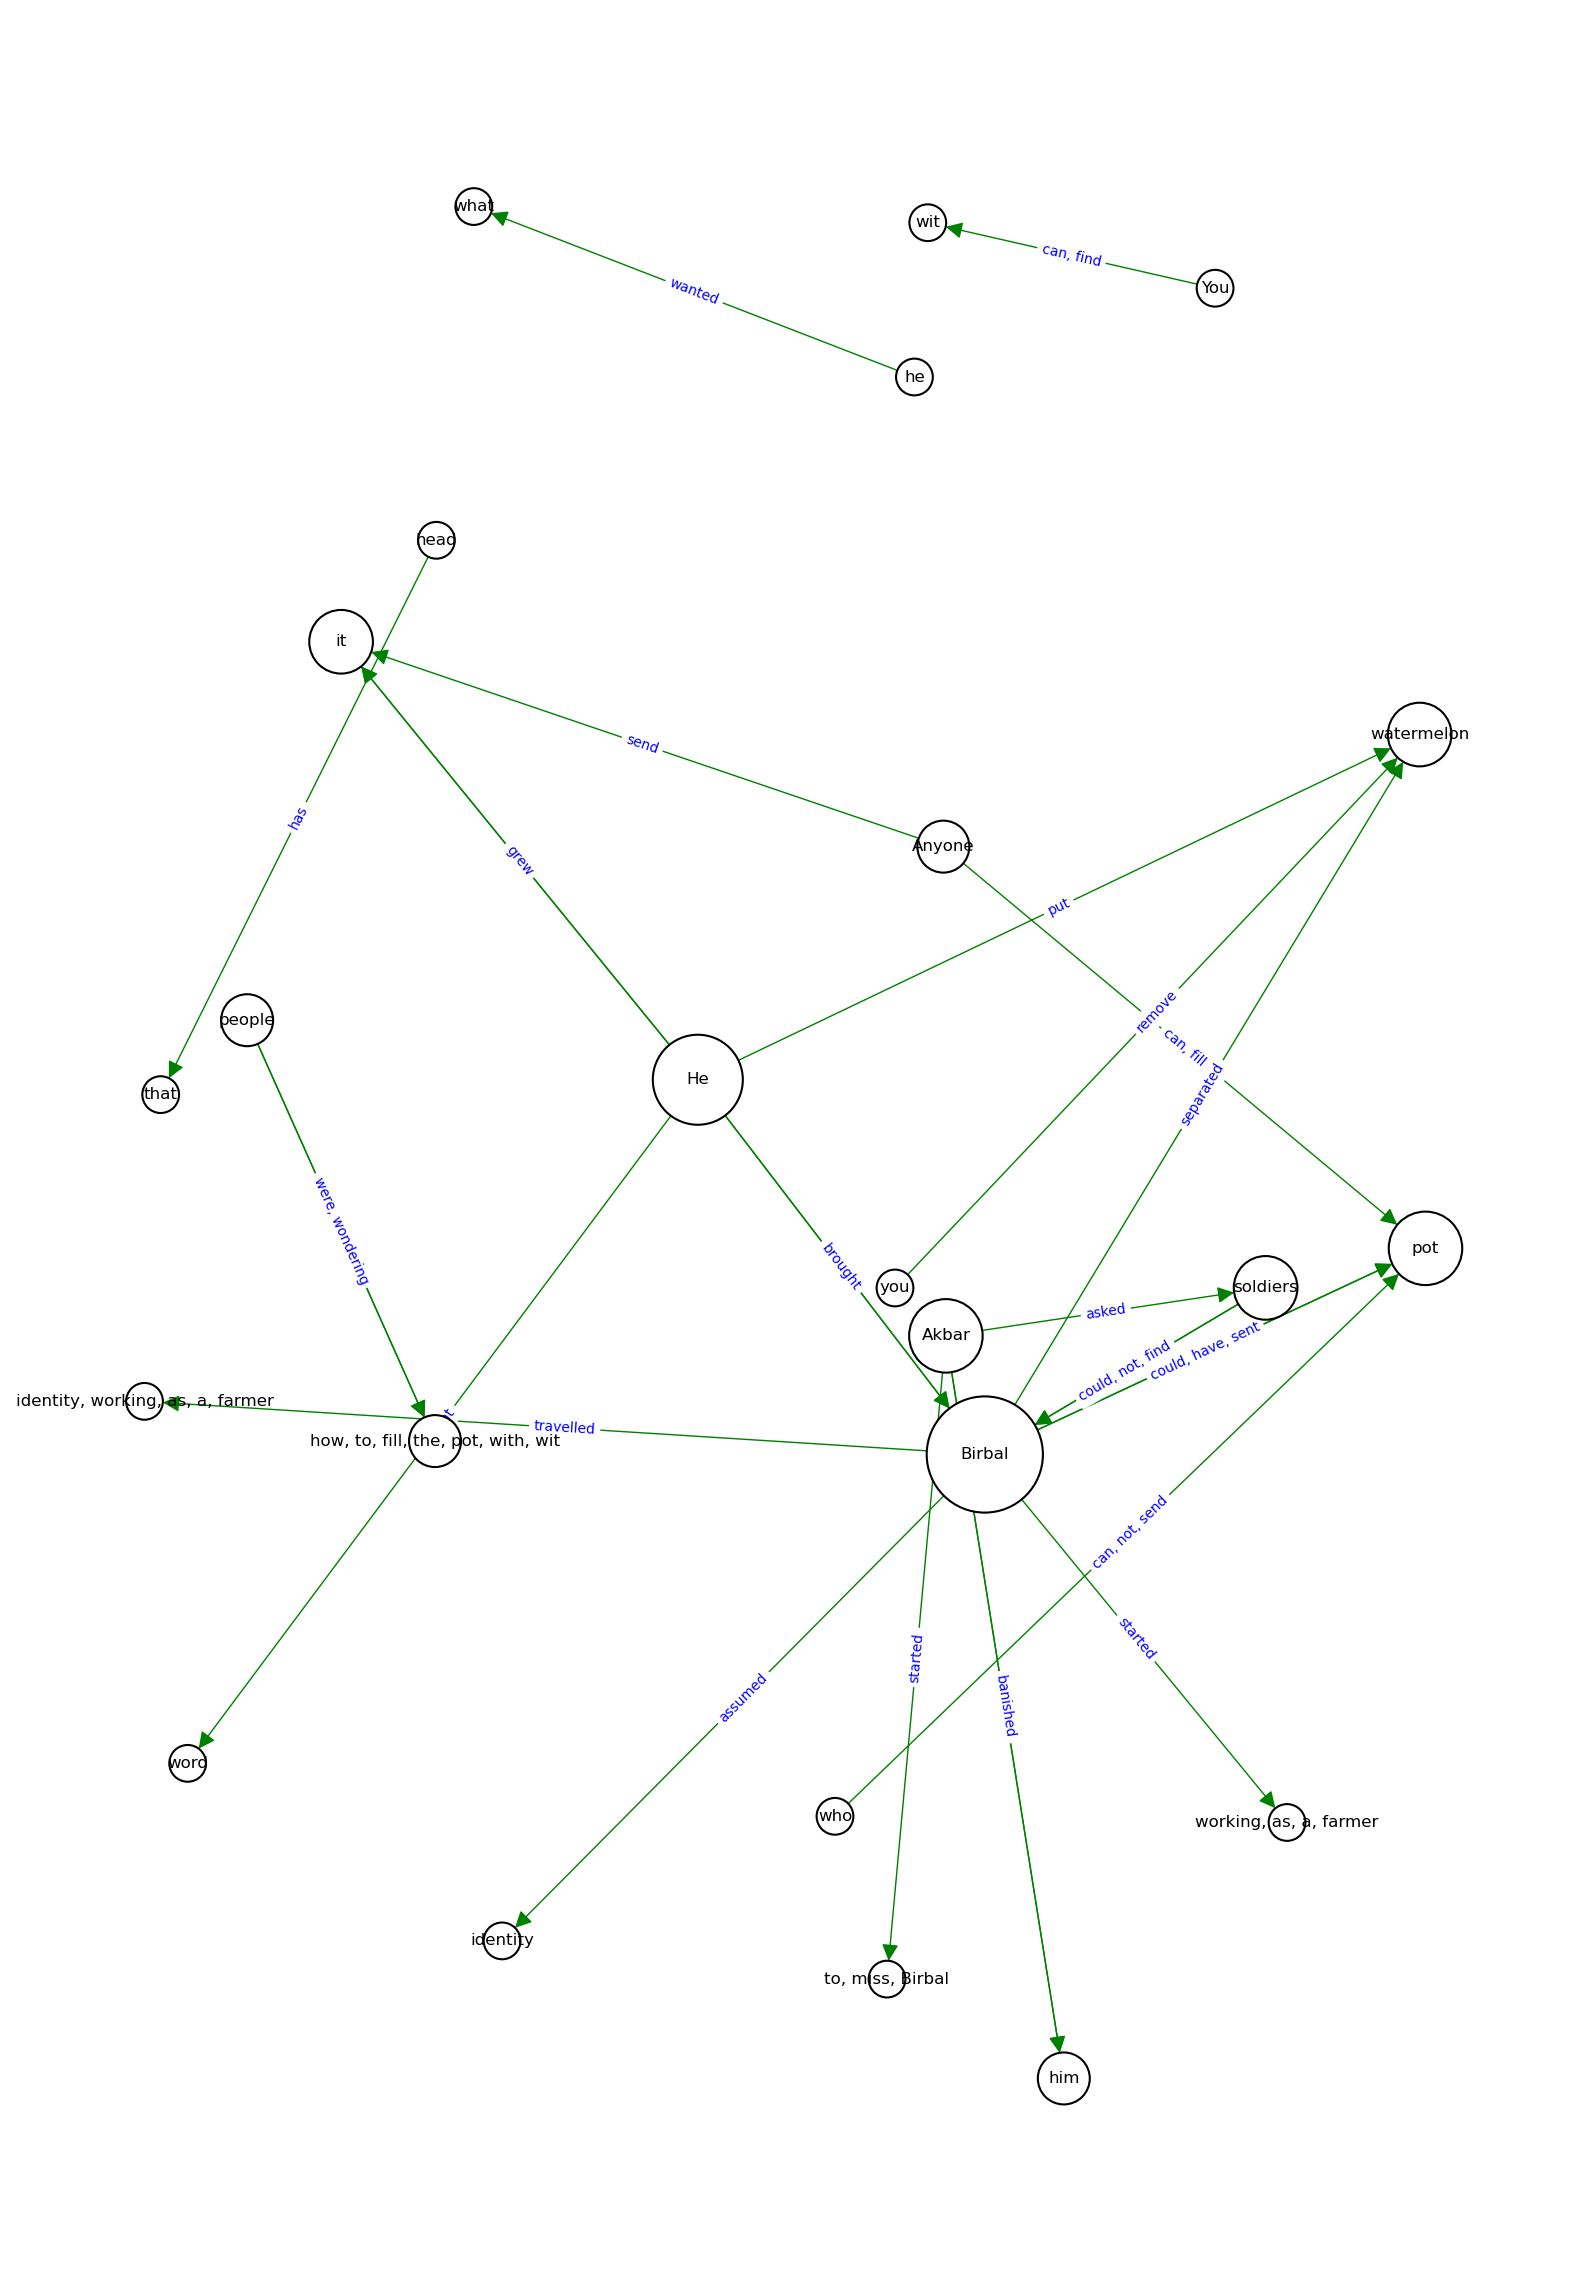

In [62]:
draw_kg(df)

### Sentiment Analysis : 

In [63]:
def flatten(input_list):
    '''
    A function to flatten complex list.
    :return: the flattened list.
    '''

    flat_list = []
    for i in input_list:
        if type(i) == list:
            flat_list += flatten(i)
        else:
            flat_list += [i]

    return flat_list

In [64]:
def name_entity_recognition(sentence):
    '''
    A function to retrieve name entities in a sentence.
    :return: a name entity list of the sentence.
    '''
    doc = nlp(sentence)
    # retrieve person and organization's name from the sentence
    name_entity = [x for x in doc.ents if x.label_ in ['Person-Name','Animal-CHAR']]
    # convert all names to lowercase and remove 's in names
    name_entity = [str(x).lower().replace("'s","") for x in name_entity]
    return name_entity

In [65]:
def iterative_NER(sentence_list, threshold_rate=0.0005):
    '''
    A function to execute the name entity recognition function iteratively. The purpose of this
    function is to recognise all the important names while reducing recognition errors.
    :param threshold_rate: the per sentence frequency threshold, if a word's frequency is lower than this
    threshold, it would be removed from the list because there might be recognition errors.
    :return: a non-duplicate list of names in the text.
    '''

    output = []
    for i in sentence_list:
        name_list = name_entity_recognition(i)
        if name_list != []:
            output.append(name_list)
    output = flatten(output)
    from collections import Counter
    output = Counter(output)
    output = [x for x in output if output[x] >= threshold_rate * len(sentence_list)]
    return output

In [66]:
def top_names(name_list, novel, top_num=20):
    '''
    A function to return the top names in a text and their frequencies.
    :top_num: the number of names the function finally output.
    :return: the list of top names and the list of top names' frequency.
    '''

    vect = CountVectorizer(vocabulary=name_list, stop_words='english')
    name_frequency = vect.fit_transform([novel.lower()])
    name_frequency = pd.DataFrame(name_frequency.toarray(), columns=vect.get_feature_names())
    name_frequency = name_frequency.T
    name_frequency = name_frequency.sort_values(by=0, ascending=False)
    name_frequency = name_frequency[0:top_num]
    names = list(name_frequency.index)
    name_frequency = list(name_frequency[0])

    return name_frequency, names


In [67]:
def calculate_align_rate(sentence_list):
    '''
    Function to calculate the align_rate of the whole text
    :return: the align rate of the text.
    '''
    afinn = Afinn()
    sentiment_score = [afinn.score(x) for x in sentence_list]
    align_rate = np.sum(sentiment_score)/len(np.nonzero(sentiment_score)[0]) * -2

    return align_rate

In [68]:
def calculate_matrix(name_list, sentence_list, align_rate):
    '''
    Function to calculate the co-occurrence matrix and sentiment matrix among all the top characters

    :return: the co-occurrence matrix and sentiment matrix.
    '''
    
    # calculate a sentiment score for each sentence in the text
    afinn = Afinn()
    sentiment_score = [afinn.score(x) for x in sentence_list]
    # calculate occurrence matrix and sentiment matrix among the top characters
    name_vect = CountVectorizer(vocabulary=name_list, binary=True)
    occurrence_each_sentence = name_vect.fit_transform(sentence_list).toarray()
    cooccurrence_matrix = np.dot(occurrence_each_sentence.T, occurrence_each_sentence)
    sentiment_matrix = np.dot(occurrence_each_sentence.T, (occurrence_each_sentence.T * sentiment_score).T)
    sentiment_matrix += align_rate * cooccurrence_matrix
    cooccurrence_matrix = np.tril(cooccurrence_matrix)
    sentiment_matrix = np.tril(sentiment_matrix)
    # diagonals of the matrices are set to be 0 (co-occurrence of name itself is meaningless)
    shape = cooccurrence_matrix.shape[0]
    cooccurrence_matrix[[range(shape)], [range(shape)]] = 0
    sentiment_matrix[[range(shape)], [range(shape)]] = 0

    return cooccurrence_matrix, sentiment_matrix

In [69]:
def matrix_to_edge_list(matrix, mode, name_list):
    '''
    Function to convert matrix (co-occurrence/sentiment) to edge list of the network graph. It determines the
    weight and color of the edges in the network graph.
    :return: the edge list with weight and color param.
    '''
    edge_list = []
    shape = matrix.shape[0]
    lower_tri_loc = list(zip(*np.where(np.triu(np.ones([shape, shape])) == 0)))
    normalized_matrix = matrix / np.max(np.abs(matrix))
    if mode == 'co-occurrence':
        weight = np.log(2000 * normalized_matrix + 1) * 0.7
        color = np.log(2000 * normalized_matrix + 1)
    if mode == 'sentiment':
        weight = np.log(np.abs(1000 * normalized_matrix) + 1) * 0.7
        color = 2000 * normalized_matrix
    for i in lower_tri_loc:
        edge_list.append((name_list[i[0]], name_list[i[1]], {'weight': weight[i], 'color': color[i]}))

    return edge_list

In [70]:
def plot_graph(name_list, name_frequency, matrix, mode):
    '''
    Function to plot the network graph (sentiment network).

    '''

    label = {i: i for i in name_list}
    edge_list = matrix_to_edge_list(matrix, mode, name_list)
    normalized_frequency = np.array(name_frequency) / np.max(name_frequency)

    plt.figure(figsize=(30, 30))
    G = nx.Graph()
    G.add_nodes_from(name_list)
    G.add_edges_from(edge_list)
    pos = nx.circular_layout(G)
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    colors = [G[u][v]['color'] for u, v in edges]

    if mode == 'co-occurrence':
        nx.draw(G, pos, node_color='#A0CBE2', node_size=np.sqrt(normalized_frequency) * 4000, edge_cmap=plt.cm.Blues,
                linewidths=10, font_size=35, labels=label, edge_color=colors, with_labels=True, width=weights)
    elif mode == 'sentiment':
        nx.draw(G, pos, node_color='#A0CBE2', node_size=np.sqrt(normalized_frequency) * 4000,
                linewidths=10, font_size=35, labels=label, edge_color=colors, with_labels=True,
                width=weights, edge_vmin=-500, edge_vmax=500)
    else:
        raise ValueError("mode should be either 'co-occurrence' or 'sentiment'")


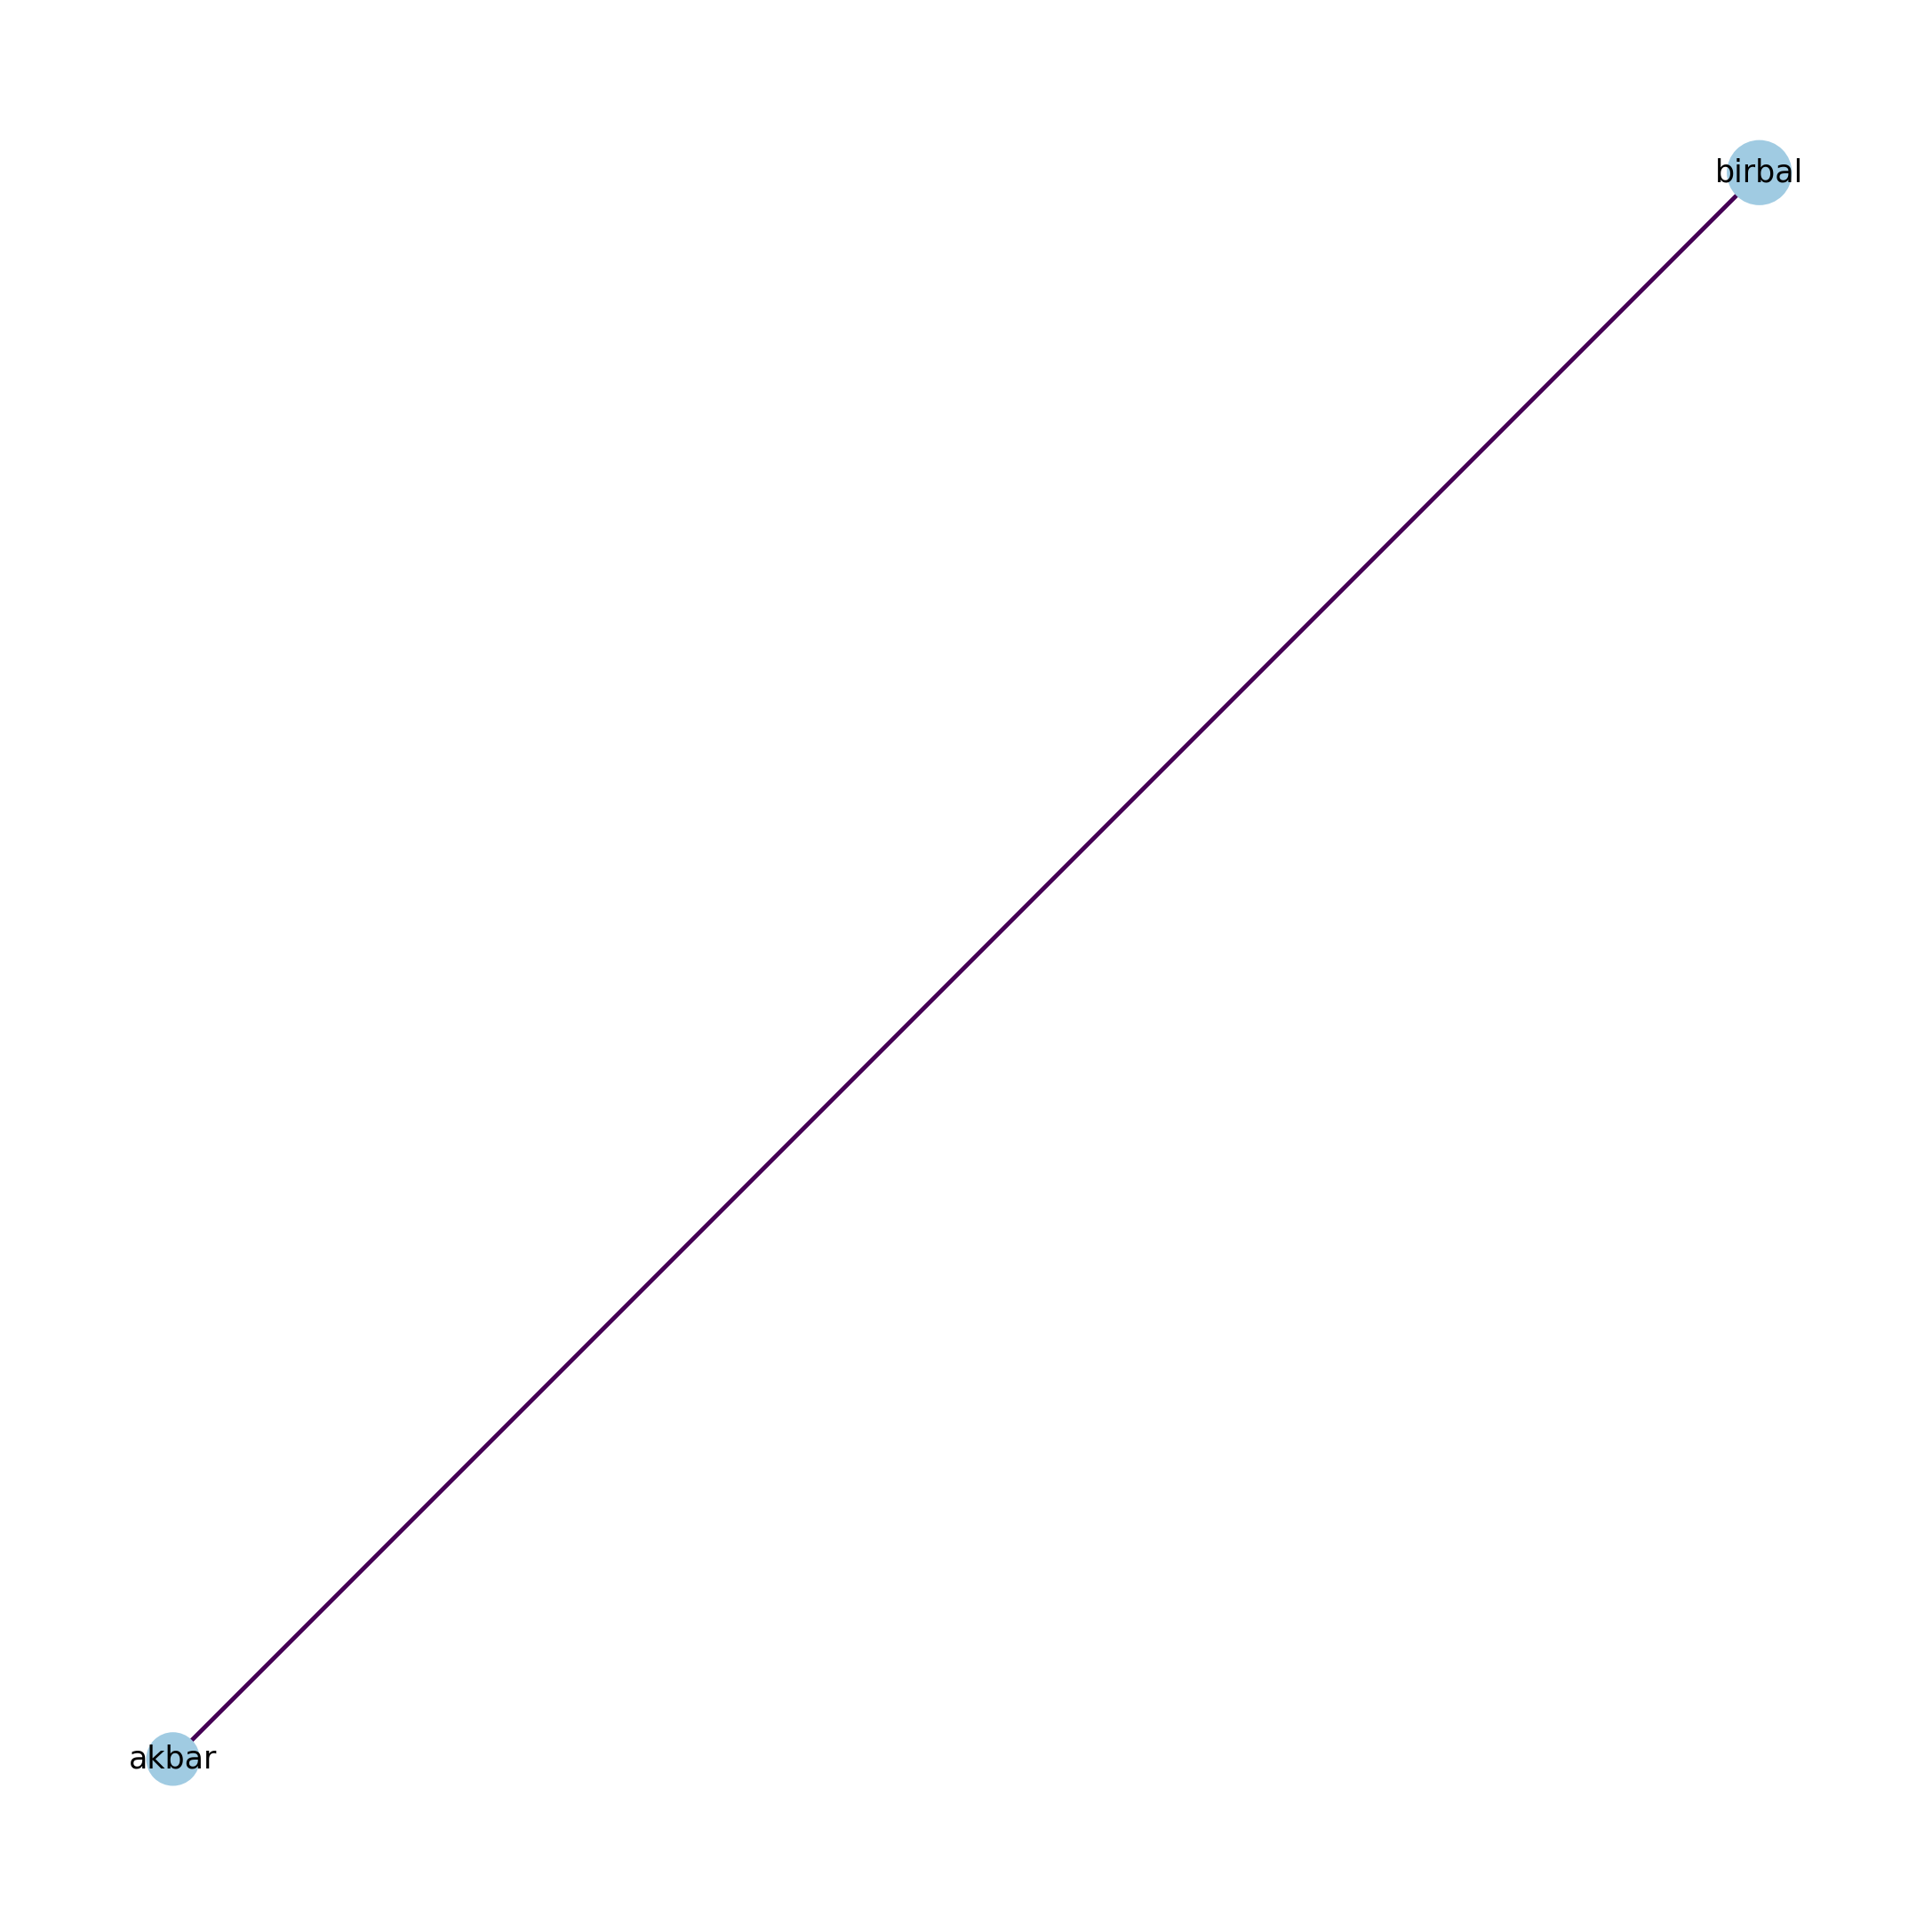

In [71]:
if __name__ == '__main__':
    sentence_list = sent_tokenize(contract_text)
    align_rate = calculate_align_rate(sentence_list)
    preliminary_name_list = iterative_NER(sentence_list)
    name_frequency, name_list = top_names(preliminary_name_list, contract_text, 25)
    cooccurrence_matrix, sentiment_matrix = calculate_matrix(name_list, sentence_list, align_rate)
    # plot sentiment graph
    plot_graph(name_list, name_frequency, sentiment_matrix, 'sentiment')


### Text Summarization:

In [72]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(sentences)
pd.DataFrame(dtm.toarray(),index=sentences,columns=vectorizer.get_feature_names
()).head(10)

,absurd,akbar,announcement,asked,assumed,banished,big,birbal,bring,brought,...,vine,wanted,watered,watermelon,way,weeks,wit,wondering,word,working
Akbar was once infuriated with Birbal and banished him from his kingdom.,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Birbal travelled to a faraway village and assumed a new identity and started working as a farmer.,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom.",0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
The soldiers searched from one end of the kingdom to another but could not find Birbal.,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Akbar then came up with an idea to find Birbal.,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
He sent word across the kingdom that the head of each village has to send him a pot full of wit.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit.,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
Birbal stepped in to help and came up with a way to give the king what he wanted.,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
He put a small watermelon into the pot without separating it from its vine.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [73]:
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


In [74]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =
vectorizer.get_feature_names())

,absurd,akbar,announcement,asked,assumed,banished,big,birbal,bring,brought,...,vine,wanted,watered,watermelon,way,weeks,wit,wondering,word,working
component_1,0.061319,0.123590,0.061319,0.030960,0.028373,0.023126,0.029713,0.334051,0.030960,0.02172,...,0.095925,0.018762,0.029713,0.185777,0.018762,0.030960,0.303108,0.061319,0.068681,0.028373
component_2,0.020116,0.278506,0.020116,0.119034,0.095559,0.070483,-0.027178,0.583066,0.119034,0.05719,...,-0.016152,0.056526,-0.027178,-0.089377,0.056526,0.119034,-0.149931,0.020116,-0.019421,0.095559


In [75]:
pd.DataFrame(dtm_lsa, index = sentences, columns = ["component_1","component_2"])

,component_1,component_2
Akbar was once infuriated with Birbal and banished him from his kingdom.,0.463475,0.886110
Birbal travelled to a faraway village and assumed a new identity and started working as a farmer.,0.427798,0.903875
"After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom.",0.382993,0.923751
The soldiers searched from one end of the kingdom to another but could not find Birbal.,0.449956,0.893051
Akbar then came up with an idea to find Birbal.,0.443743,0.896154
He sent word across the kingdom that the head of each village has to send him a pot full of wit.,0.984622,-0.174696
Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him.,0.863827,-0.503788
The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit.,0.979468,0.201600
Birbal stepped in to help and came up with a way to give the king what he wanted.,0.467669,0.883904
He put a small watermelon into the pot without separating it from its vine.,0.904936,-0.425547


In [76]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=sentences, columns=sentences).head(10)


,Akbar was once infuriated with Birbal and banished him from his kingdom.,Birbal travelled to a faraway village and assumed a new identity and started working as a farmer.,"After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom.",The soldiers searched from one end of the kingdom to another but could not find Birbal.,Akbar then came up with an idea to find Birbal.,He sent word across the kingdom that the head of each village has to send him a pot full of wit.,Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him.,The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit.,Birbal stepped in to help and came up with a way to give the king what he wanted.,He put a small watermelon into the pot without separating it from its vine.,He watered it every day and grew it big enough so that all the space in the pot was taken up.,Birbal then separated the watermelon from the vine and sent the pot to the king.,"The instruction that was sent with the pot read, “You can find the wit in the pot if you carefully remove the watermelon without cutting it.”",Akbar realised that only Birbal could have sent the pot.,He travelled to the village himself and brought Birbal back to the capital.
Akbar was once infuriated with Birbal and banished him from his kingdom.,1.000000,0.999206,0.996053,0.999885,0.999755,0.301547,-0.046050,0.632598,0.999989,0.042334,-0.039014,0.560213,0.009304,0.740534,0.998046
Birbal travelled to a faraway village and assumed a new identity and started working as a farmer.,0.999206,1.000000,0.998799,0.999696,0.999843,0.263315,-0.085818,0.601235,0.999006,0.002489,-0.078801,0.526760,-0.030549,0.713167,0.994764
"After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom.",0.996053,0.998799,1.000000,0.997287,0.997774,0.215728,-0.134535,0.561358,0.995621,-0.046515,-0.127554,0.484476,-0.079490,0.677961,0.988561
The soldiers searched from one end of the kingdom to another but could not find Birbal.,0.999885,0.999696,0.997287,1.000000,0.999976,0.287024,-0.061224,0.620757,0.999801,0.027147,-0.054194,0.547561,-0.005892,0.730236,0.996981
Akbar then came up with an idea to find Birbal.,0.999755,0.999843,0.997774,0.999976,1.000000,0.280365,-0.068154,0.615297,0.999639,0.020204,-0.061128,0.541736,-0.012837,0.725474,0.996418
He sent word across the kingdom that the head of each village has to send him a pot full of wit.,0.301547,0.263315,0.215728,0.287024,0.280365,1.000000,0.938554,0.929187,0.306062,0.965362,0.940961,0.958721,0.956216,0.864044,0.360531
Anyone who cannot send the pot full of wit can instead fill up the pot with Gold and Diamonds and send it to him.,-0.046050,-0.085818,-0.134535,-0.061224,-0.068154,0.938554,1.000000,0.744527,-0.041316,0.996094,0.999975,0.801672,0.998467,0.637205,0.016455
The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit.,0.632598,0.601235,0.561358,0.620757,0.615297,0.929187,0.744527,1.000000,0.636261,0.800566,0.749210,0.995929,0.780332,0.988926,0.679753
Birbal stepped in to help and came up with a way to give the king what he wanted.,0.999989,0.999006,0.995621,0.999801,0.999639,0.306062,-0.041316,0.636261,1.000000,0.047068,-0.034279,0.564132,0.014043,0.743710,0.998331
He put a small watermelon into the pot without separating it from its vine.,0.042334,0.002489,-0.046515,0.027147,0.020204,0.965362,0.996094,0.800566,0.047068,1.000000,0.996691,0.851322,0.999454,0.702767,0.104676


In [77]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab)

(117, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
absurd,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.29,0.0,0.00,0.00,0.0,0.00,0.00,0.0
across,0.00,0.00,0.00,0.0,0.00,0.28,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
after,0.00,0.00,0.24,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
akbar,0.26,0.00,0.17,0.0,0.29,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.29,0.0
all,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.25,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
without,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.29,0.00,0.0,0.19,0.00,0.0
wondering,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.29,0.0,0.00,0.00,0.0,0.00,0.00,0.0
word,0.00,0.00,0.00,0.0,0.00,0.28,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
working,0.00,0.31,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0


In [78]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [79]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(117, 3) (3,) (3, 15)


In [80]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [81]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.60861675, 0.68559382, 0.69232962, 0.56993557, 0.61957076,
       0.53642132, 0.57783151, 0.60697176, 0.51182747, 0.54788192,
       0.5002928 , 0.67950765, 0.72152476, 0.55626781, 0.71622272])

In [82]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()


In [83]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Akbar was once infuriated with Birbal and banished him from his kingdom.
Birbal travelled to a faraway village and assumed a new identity and started working as a farmer.
After a couple of weeks, Akbar started to miss Birbal and hence asked his soldiers to find where he is and bring him back to the Kingdom.
Akbar then came up with an idea to find Birbal.
The people in Birbal’s village found the announcement absurd and were wondering how to fill the pot with wit.
Birbal then separated the watermelon from the vine and sent the pot to the king.
The instruction that was sent with the pot read, “You can find the wit in the pot if you carefully remove the watermelon without cutting it.”
He travelled to the village himself and brought Birbal back to the capital.


# Time taken to run the program

In [84]:
print(time.process_time() - start,'sec')

3.15625 sec
